In [1]:
import os 
import glob
from pathlib import Path
import pandas as pd 
import numpy as np 

In [3]:
gbm_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti')

In [4]:
lgg_patients = os.listdir('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti')

## We need to map the segmentations that are seemingly randomly named from one of the T1, T2, T2-FLAIR or T1C nifti images that were fed to the algorithm

In [6]:
series_folders_with_segs = os.listdir('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval')

In [14]:
# patient = gbm_patients[0]

In [15]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti"

In [16]:
# [x.split('/')[-1] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [20]:
gbm_patientID_to_seriesID = {}
for patient in gbm_patients: 
    gbm_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [41]:
root_dir = "/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti"

In [30]:
lgg_patientID_to_seriesID = {}
for patient in lgg_patients: 
    lgg_patientID_to_seriesID[patient] = [x.split('/')[-1].split('.')[0:-2][0] for x in glob.glob(root_dir+"/"+patient+"/*/*")]

In [21]:
gbm_patientID_to_seriesID

{'TCGA-06-0210': ['1-SAG_LOCAL-29333',
  '3-AXIAL_T1-88865',
  '2-AXIAL_T2-83081',
  '4-AXIAL_T1_POST_GD-64939'],
 'TCGA-08-0350': ['15-3DFSE_AXIAL-04462',
  '1-TI_SAG_MR_BRAIN_WHOLE_HEAD-52088',
  '5-3DFSE_AXIAL-96333',
  '3-FMPSPGR_SAG-00857',
  '6-FLAIR_AXIAL-64078',
  '4-3DSPGR_AXIAL-74692',
  '14-3DSPGR_AXIAL-02601',
  '2-FSE_AX_MR_BRAIN-11136'],
 'TCGA-14-0865': ['101-BRAIN_WWO_mst_scout-71529',
  '701-BRAIN_WWO_T1_COR_POST-08207',
  '301-BRAIN_WWO_T1_AX_PRE-13193',
  '601-BRAIN_WWO_T1_AX_POST-95894',
  '201-BRAIN_WWO_T1_SAG_23SL-32502',
  '301-BRAIN_WWO_T1_AX_PRE-13193a',
  '501-BRAIN_WWO_FLAIR_AX-67274a',
  '701-BRAIN_WWO_T1_COR_POST-08207a',
  '401-BRAIN_WWO_T2_AX_GRASE-74294a',
  '501-BRAIN_WWO_FLAIR_AX-67274',
  '201-BRAIN_WWO_T1_SAG_23SL-32502a',
  '401-BRAIN_WWO_T2_AX_GRASE-74294',
  '601-BRAIN_WWO_T1_AX_POST-95894a',
  '1-59045',
  '2-58416',
  '501-BRAIN_WOW_FLAIR_AX-76993',
  '201-BRAIN_WOW_T1_SAG-03766',
  '701-BRAIN_WOW_AX_T1_POST-93808a',
  '801-BRAIN_WOW_COR_T1_POST

In [26]:
mapping_dict = {}

In [39]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in gbm_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [38]:
for idx, i in enumerate(series_folders_with_segs): 
    for key, value in lgg_patientID_to_seriesID.items(): 
        if i in value: 
#             print(idx, i, key)
            mapping_dict[i] = key

In [32]:
mapping_dict

{'7-MRHG_T1_AX_POST_GAD-84768a': 'TCGA-19-0963',
 '11-AxT1-thin_for_surgery-54106a': 'TCGA-06-0119',
 '801-brain_with_AX_T1_POST-15005a': 'TCGA-14-1453',
 '6-AX_T1_POST-52648a': 'TCGA-02-0116',
 '12-AX_T1_POST_GD_FLAIR-61610a': 'TCGA-06-1802',
 '7-AXIAL_T1_GD-06033a': 'TCGA-06-0133',
 '10-AX_T1_POST_GD_FLAIR-07635a': 'TCGA-06-0192',
 '8-AX_SPGR_3D-23898a': 'TCGA-08-0390',
 '7-MRHG_T1_AX_POST_GAD-07452a': 'TCGA-19-1388',
 '11-MRHG_T1_AX_POST_GAD-32132a': 'TCGA-19-0955',
 '1401-T1_SAG_POST-07378a': 'TCGA-76-6664',
 '6-3D_SPGR_AX-79240a': 'TCGA-08-0521',
 '9-AX_T1_POST_GD_FLAIR-32350a': 'TCGA-06-0171',
 '6-3D_SPGR_AX-57389a': 'TCGA-08-0360',
 '8-Ax_T1_2': 'TCGA-DU-5851',
 '901-T1_AX_POST-37946a': 'TCGA-14-0789',
 '6-AX_T1_POST-51465a': 'TCGA-02-0033',
 '801-T1_AX_POST-02808a': 'TCGA-14-0790',
 '7-AX_3D_SPGR_GAD-17095a': 'TCGA-08-0356',
 '9-AX_T1_POST_GD_FLAIR-08425a': 'TCGA-06-0149',
 '2-ax_t1_c-85616a': 'TCGA-12-1093',
 '9-AX_T1_POST-58593a': 'TCGA-12-3650',
 '11-AXIAL_T1_GD-28546a': 'TC

In [34]:
len(mapping_dict.keys())

202

## Now just quickly visually spot checking a few of the segmentations to see if they are correct: 

In [44]:
## Let's investigate just a few of them to ensure that they are correct: 
import nibabel as nib
import matplotlib.pyplot as plt

### TCGA-DU-A5TS

Chosen b/c has an odd (potentially problematic) naming issue: 

In [53]:
fla_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-A5TS/07-26-1997-MRI_BRAIN_WWO_CONTRAST-00379/4-Ax_FLAIR_2.5mm_for_surgery-75341a.nii.gz')

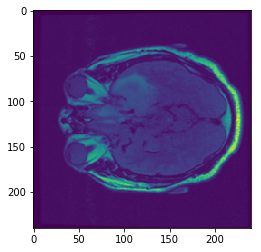

In [59]:
plt.imshow(fla_DU_A5TS.dataobj[:,:,60])

In [61]:
seg_WT_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval/11-Ax_T1_2/11-Ax_T1_2_WT.nii.gz')

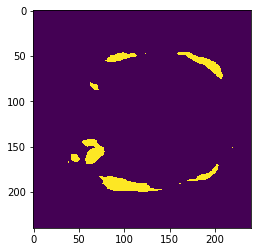

In [62]:
plt.imshow(seg_WT_DU_A5TS.dataobj[:,:,60])

In [63]:
seg_ET_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/segmentation_mri_brain_tumors_br16_full_v1/eval/11-Ax_T1_2/11-Ax_T1_2_ET.nii.gz')

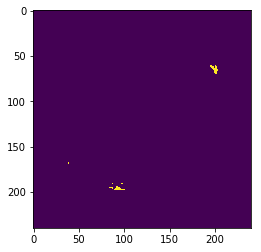

In [64]:
plt.imshow(seg_ET_DU_A5TS.dataobj[:,:,60])

### TCGA-06-0241

Chosen Randomly, maps to `10-AX_T1_POST_GD_FLAIR-95256a`


In [ ]:
fla_DU_A5TS = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-A5TS/07-26-1997-MRI_BRAIN_WWO_CONTRAST-00379/4-Ax_FLAIR_2.5mm_for_surgery-75341a.nii.gz')

## Perhaps it's because these are clearly not skull stripped? Let's try using bet on a single patient and then seeing what happens: 

`>>> /working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-08-0349/02-01-1998-MSTEALTH-44732 >` `bet 2-3DSPGR_AXIAL-59152.nii.gz 2-3DSPGR_AXIAL-59152_n.nii.gz`

In [65]:
bet_output = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-GBM-nifti/TCGA-08-0349/02-01-1998-MSTEALTH-44732/2-3DSPGR_AXIAL-59152_n.nii.gz')

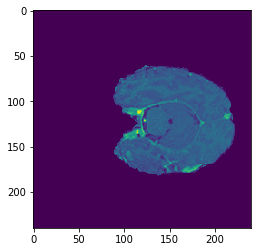

In [66]:
plt.imshow(bet_output.dataobj[:,:,60])

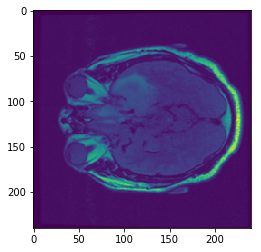

In [73]:
plt.imshow(fla_DU_A5TS.dataobj[:,:,60])

In [67]:
bet_output = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-A5TS/07-26-1997-MRI_BRAIN_WWO_CONTRAST-00379/4-Ax_FLAIR_2.5mm_for_surgery-75341a_n.nii.gz')

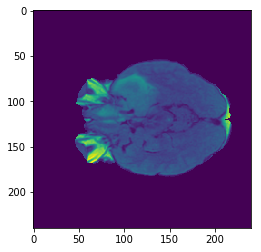

In [70]:
plt.imshow(bet_output.dataobj[:,:,60])

In [71]:
bet_output = nib.load('/working/lupolab/julia/tcia_analysis/datasets/TCGA-LGG-nifti/TCGA-DU-A5TS/07-26-1997-MRI_BRAIN_WWO_CONTRAST-00379/4-Ax_FLAIR_2.5mm_for_surgery-75341a_n.nii.gz')

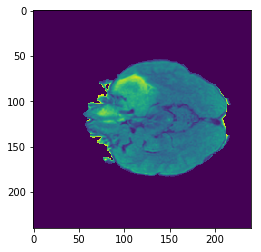

In [72]:
plt.imshow(bet_output.dataobj[:,:,60])

## Ok so this is attempt #1, that clearly didn't work, going to have to go back + skull strip + run inference again.... 